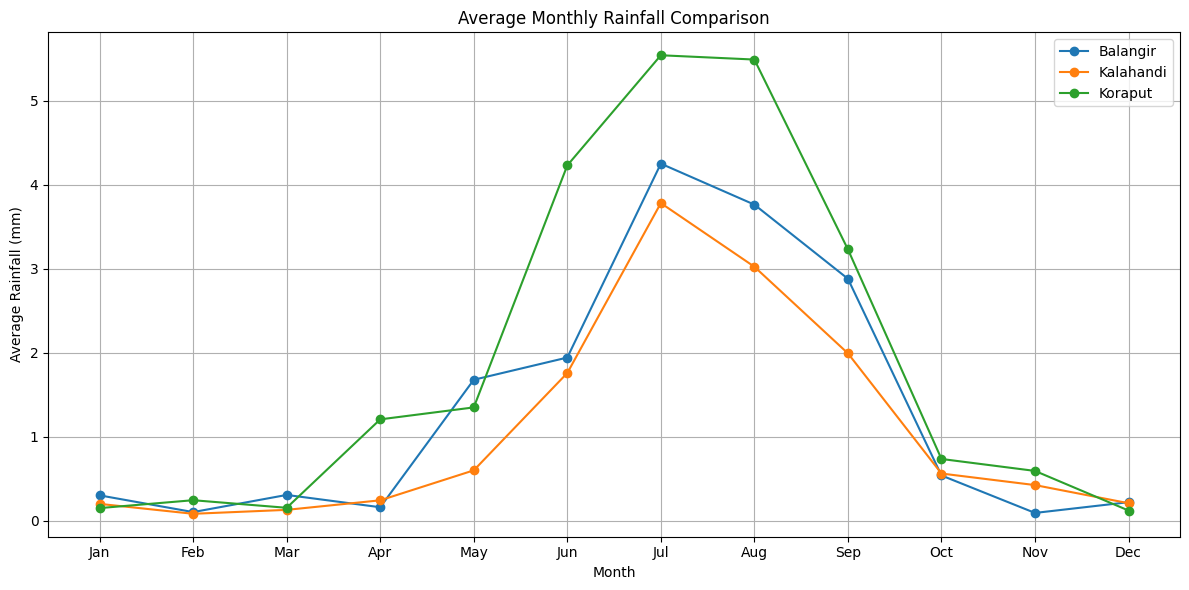

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define proper column names
columns = ['Station Code', 'Description', 'DateTime', 'Rainfall', 'Unit']

# Read and fix each dataset
murtha = pd.read_excel('Rainfall_Murthahandi (journala)_koraput.xlsx', skiprows=13, names=columns)
kesinga = pd.read_excel('Rainfall_Kesinga_Kalahandi.xlsx', skiprows=13, names=columns)
salebhata = pd.read_excel('Rainfall_Salebhata_Balangir.xlsx', skiprows=13, names=columns)

# Add Region column
murtha['Region'] = 'Koraput'
kesinga['Region'] = 'Kalahandi'
salebhata['Region'] = 'Balangir'

# Combine all datasets
df = pd.concat([murtha, kesinga, salebhata])

# Convert DateTime column to proper datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract month and year
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['MonthName'] = df['DateTime'].dt.strftime('%b')

# Group by Region and Month to calculate monthly average rainfall
monthly_avg = df.groupby(['Region', 'Month', 'MonthName'])['Rainfall'].mean().reset_index()

# Sort months correctly
monthly_avg = monthly_avg.sort_values('Month')

# Plotting
plt.figure(figsize=(12, 6))
for region in monthly_avg['Region'].unique():
    region_data = monthly_avg[monthly_avg['Region'] == region]
    plt.plot(region_data['MonthName'], region_data['Rainfall'], marker='o', label=region)

plt.title('Average Monthly Rainfall Comparison')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


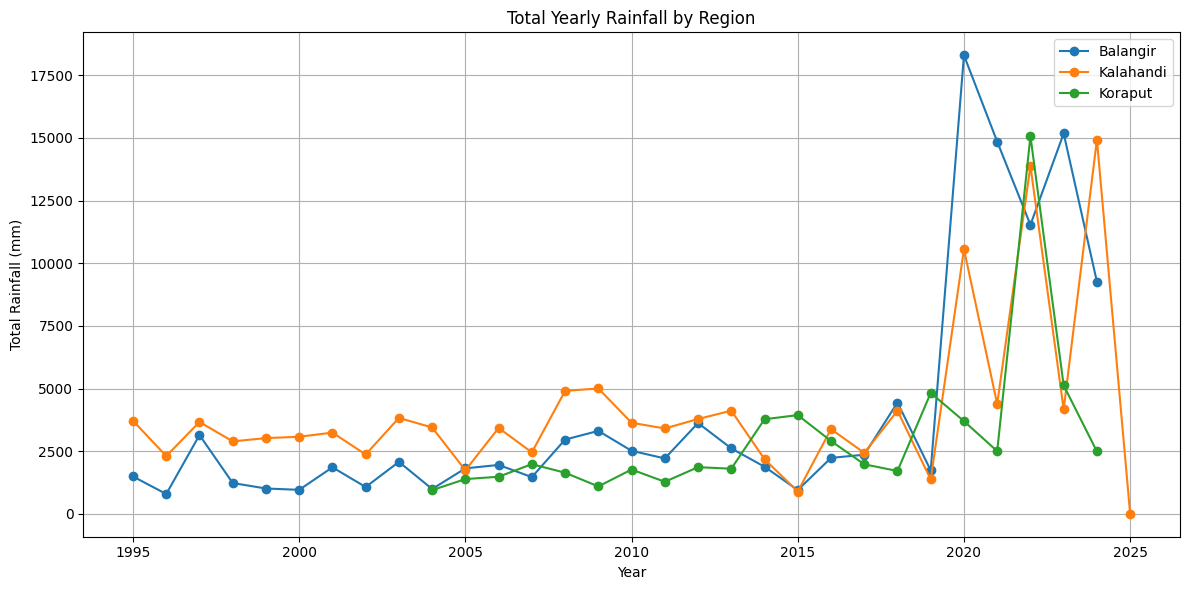

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Define proper column names
columns = ['Station Code', 'Description', 'DateTime', 'Rainfall', 'Unit']

# Load datasets with corrected headers
murtha = pd.read_excel('Rainfall_Murthahandi (journala)_koraput.xlsx', skiprows=13, names=columns)
kesinga = pd.read_excel('Rainfall_Kesinga_Kalahandi.xlsx', skiprows=13, names=columns)
salebhata = pd.read_excel('Rainfall_Salebhata_Balangir.xlsx', skiprows=13, names=columns)

# Add region labels
murtha['Region'] = 'Koraput'
kesinga['Region'] = 'Kalahandi'
salebhata['Region'] = 'Balangir'

# Combine datasets
df = pd.concat([murtha, kesinga, salebhata])

# Convert to datetime and extract year
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df['Year'] = df['DateTime'].dt.year

# Remove any rows where year is NaN
df = df.dropna(subset=['Year'])

# Group by Region and Year, summing rainfall
yearly_total = df.groupby(['Region', 'Year'])['Rainfall'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
for region in yearly_total['Region'].unique():
    region_data = yearly_total[yearly_total['Region'] == region]
    plt.plot(region_data['Year'], region_data['Rainfall'], marker='o', label=region)

plt.title('Total Yearly Rainfall by Region')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


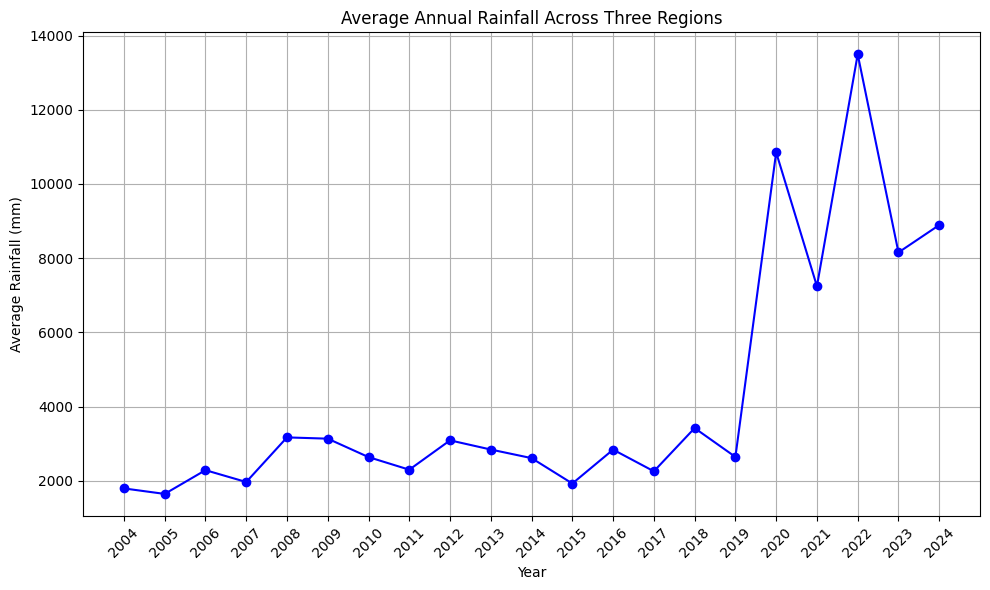

In [3]:
# Ensure the 'Year' column exists and is properly created in all dataframes
for df in [murtha, kesinga, salebhata]:
	df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')  # Ensure DateTime is in datetime format
	df['Year'] = df['DateTime'].dt.year  # Extract the year from DateTime
	df.dropna(subset=['Year'], inplace=True)  # Drop rows where Year is NaN
	df['Year'] = df['Year'].astype(int)  # Convert Year to integer

# Combine yearly rainfall data for all regions and calculate average rainfall
murtha_yearly = murtha.groupby('Year')['Rainfall'].sum().reset_index()
kesinga_yearly = kesinga.groupby('Year')['Rainfall'].sum().reset_index()
salebhata_yearly = salebhata.groupby('Year')['Rainfall'].sum().reset_index()

# Merge the dataframes on 'Year'
combined = murtha_yearly.merge(kesinga_yearly, on='Year', suffixes=('_Murtha', '_Kesinga'))
combined = combined.merge(salebhata_yearly, on='Year')
combined.rename(columns={'Rainfall': 'Rainfall_Salebhata'}, inplace=True)

# Calculate the average rainfall across the three regions
combined['Average_Rainfall'] = combined[['Rainfall_Murtha', 'Rainfall_Kesinga', 'Rainfall_Salebhata']].mean(axis=1)

# Clean and prepare for plotting
combined = combined.dropna(subset=['Year'])
combined['Year'] = combined['Year'].astype(int)

# Sort by year just in case
combined = combined.sort_values('Year')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(combined['Year'], combined['Average_Rainfall'], marker='o', linestyle='-', color='blue')
plt.title('Average Annual Rainfall Across Three Regions')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.xticks(combined['Year'], rotation=45)  # Rotate for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()


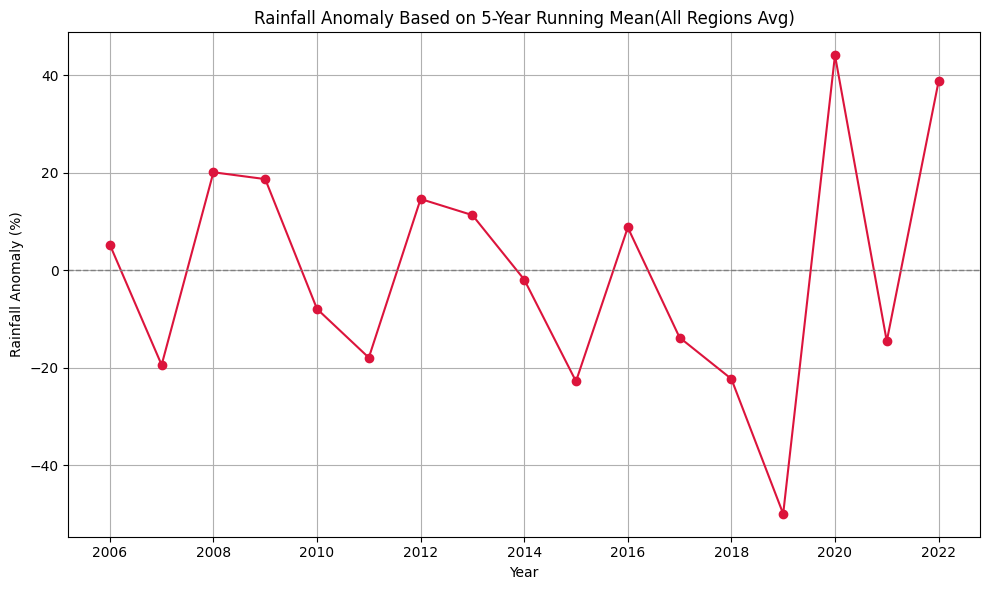

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
columns = ['Station Code', 'Description', 'DateTime', 'Rainfall', 'Unit']

murtha = pd.read_excel('Rainfall_Murthahandi (journala)_koraput.xlsx', skiprows=13, names=columns)
kesinga = pd.read_excel('Rainfall_Kesinga_Kalahandi.xlsx', skiprows=13, names=columns)
salebhata = pd.read_excel('Rainfall_Salebhata_Balangir.xlsx', skiprows=13, names=columns)

for df in [murtha, kesinga, salebhata]:
    df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
    df['Year'] = df['DateTime'].dt.year.astype('Int64')

# Group by year
murtha_yearly = murtha.groupby('Year')['Rainfall'].sum().reset_index()
kesinga_yearly = kesinga.groupby('Year')['Rainfall'].sum().reset_index()
salebhata_yearly = salebhata.groupby('Year')['Rainfall'].sum().reset_index()

# Merge and compute average
combined_rainfall= murtha_yearly.merge(kesinga_yearly, on='Year', suffixes=('_Murtha', '_Kesinga'))
combined_rainfall = combined_rainfall.merge(salebhata_yearly, on='Year')
combined_rainfall.rename(columns={'Rainfall': 'Rainfall_Salebhata'}, inplace=True)

combined_rainfall['Average_Rainfall'] = combined_rainfall[['Rainfall_Murtha', 'Rainfall_Kesinga', 'Rainfall_Salebhata']].mean(axis=1)
combined_rainfall = combined_rainfall.dropna(subset=['Year'])
combined_rainfall['Year'] = combined_rainfall['Year'].astype(int)
combined_rainfall = combined_rainfall.sort_values('Year')

# Calculate 5-year running mean (y'')
combined_rainfall['Rainfall_5yr_Mean'] = combined_rainfall['Average_Rainfall'].rolling(window=5, center=True).mean()

# Calculate anomaly y'
combined_rainfall['Rainfall_Anomaly (%)'] = ((combined_rainfall['Average_Rainfall'] - combined_rainfall['Rainfall_5yr_Mean']) / combined_rainfall['Rainfall_5yr_Mean']) * 100

# Plot anomaly graph
plt.figure(figsize=(10, 6))
plt.plot(combined_rainfall['Year'], combined_rainfall['Rainfall_Anomaly (%)'], marker='o', linestyle='-', color='crimson')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Rainfall Anomaly Based on 5-Year Running Mean(All Regions Avg)')
plt.xlabel('Year')
plt.ylabel('Rainfall Anomaly (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


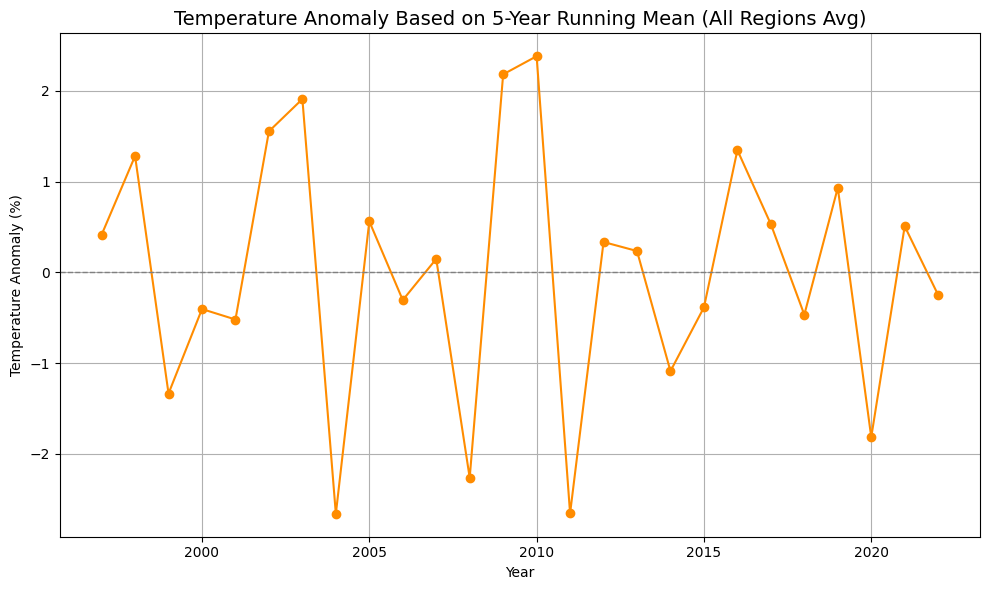

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for the three regions (update these if filenames differ)
files = {
    'Koraput': 'Temp_Koraput.csv',
    'Kalahandi': 'Temp_Kalahandi.csv',
    'Balangir': 'Temp_Bolangir.csv'
}

# Dictionary to hold each region's yearly average temp
dataframes = {}

# Load and process each file
for region, filepath in files.items():
    df = pd.read_csv(filepath)  # no skiprows, header is present
    df = df[['YEAR', 'T2M']].copy()
    df = df.dropna(subset=['YEAR', 'T2M'])
    
    df['YEAR'] = df['YEAR'].astype(int)
    df['T2M'] = pd.to_numeric(df['T2M'], errors='coerce')

    # Group by year and calculate mean temperature
    yearly_avg = df.groupby('YEAR')['T2M'].mean().reset_index()
    yearly_avg.rename(columns={'T2M': f'Temperature_{region}'}, inplace=True)
    dataframes[region] = yearly_avg

# Merge the three regional yearly averages on 'YEAR'
combined_temp = dataframes['Koraput']
combined_temp = combined_temp.merge(dataframes['Kalahandi'], on='YEAR', how='inner')
combined_temp = combined_temp.merge(dataframes['Balangir'], on='YEAR', how='inner')

# Calculate the average temperature across the three regions
combined_temp['Average_Temperature'] = combined_temp[
    ['Temperature_Koraput', 'Temperature_Kalahandi', 'Temperature_Balangir']
].mean(axis=1)

# Sort by year and drop NaN if any
combined_temp = combined_temp.sort_values('YEAR').dropna()

# Calculate 5-year centered running mean (y'')
combined_temp['Temp_5yr_Mean'] = combined_temp['Average_Temperature'].rolling(window=5, center=True).mean()

# Calculate anomaly y' = [(y - y'') / y''] * 100
combined_temp['Temperature_Anomaly (%)'] = (
    (combined_temp['Average_Temperature'] - combined_temp['Temp_5yr_Mean']) / combined_temp['Temp_5yr_Mean']
) * 100

# Plot the temperature anomaly
plt.figure(figsize=(10, 6))
plt.plot(combined_temp['YEAR'], combined_temp['Temperature_Anomaly (%)'],
         marker='o', linestyle='-', color='darkorange', label='Temp Anomaly')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Temperature Anomaly Based on 5-Year Running Mean (All Regions Avg)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


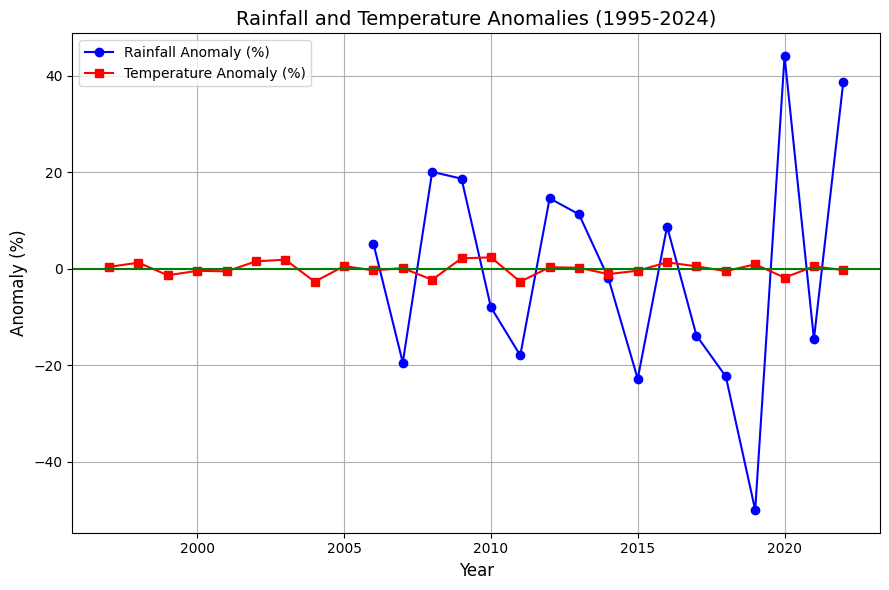

In [6]:
# Create a figure for both plots
plt.figure(figsize=(9, 6))

# Plot Rainfall Anomaly using the 'combined_rainfall' DataFrame from rainfall analysis
plt.plot(combined_rainfall['Year'], combined_rainfall['Rainfall_Anomaly (%)'],
         label='Rainfall Anomaly (%)', color='blue', marker='o')

# Plot Temperature Anomaly using the 'combined' DataFrame from temperature analysis
plt.plot(combined_temp['YEAR'], combined_temp['Temperature_Anomaly (%)'],
         label='Temperature Anomaly (%)', color='red', marker='s')

# Add title and labels
plt.title('Rainfall and Temperature Anomalies (1995-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Anomaly (%)', fontsize=12)

# Add zero line
plt.axhline(y=0, color='green', linestyle='-', linewidth=1.5)

# Add legend
plt.legend()

# Add grid
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

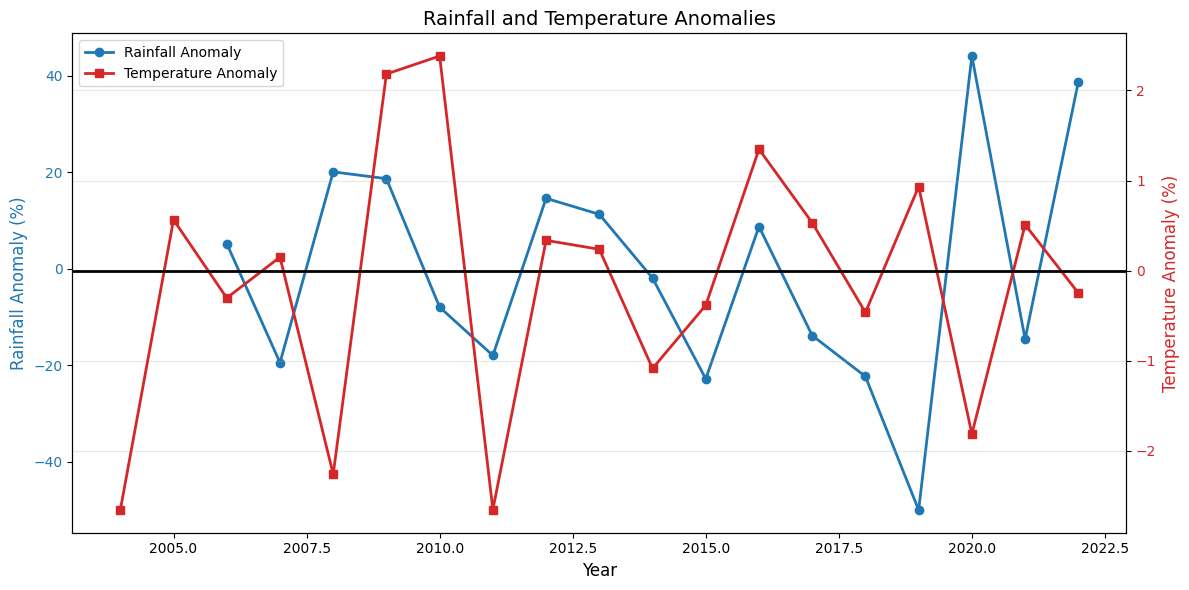

In [7]:
# First, identify common years between rainfall and temperature data
common_years = set(combined_rainfall['Year']).intersection(set(combined_temp['YEAR']))

# Filter both datasets to only include common years
combined_rainfall = combined_rainfall[combined_rainfall['Year'].isin(common_years)]
combined_temp = combined_temp[combined_temp['YEAR'].isin(common_years)]

# Sort both datasets by year
combined_rainfall = combined_rainfall.sort_values('Year')
combined_temp = combined_temp.sort_values('YEAR')

# Now plot with aligned data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Rainfall Anomaly (Left Y-axis)
color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Rainfall Anomaly (%)', color=color, fontsize=12)
ax1.plot(combined_rainfall['Year'], combined_rainfall['Rainfall_Anomaly (%)'], 
         color=color, label='Rainfall Anomaly', linewidth=2, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Plot Temperature Anomaly (Right Y-axis)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Temperature Anomaly (%)', color=color, fontsize=12)
ax2.plot(combined_rainfall['Year'], combined_temp['Temperature_Anomaly (%)'], 
         color=color, label='Temperature Anomaly', linewidth=2, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

# Add zero line
plt.axhline(y=0, color='black', linestyle='-', linewidth=2, alpha=1)

# Add title and grid
plt.title('Rainfall and Temperature Anomalies', fontsize=14)
fig.tight_layout()
plt.grid(True, alpha=0.3)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()